In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns


In [2]:
df = pd.read_csv("F:\\the khan\\EDA Project\\Road Accident Data.csv")



In [3]:
df

,All Insites,Accident Date,Month,Year,Day_of_Week,Junction_Control,Junction_Detail,Accident_Severity,Latitude,Light_Conditions,...,Number_of_Casualties,Number_of_Vehicles,Police_Force,Road_Surface_Conditions,Road_Type,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,200901BS70001,1/1/2021,January,2021,Thursday,Give way or uncontrolled,T or staggered junction,Serious,51.512273,Daylight,...,1,2,Metropolitan Police,Dry,One way street,30,15:11,Urban,Fine no high winds,Car
1,200901BS70002,1/5/2021,January,2021,Monday,Give way or uncontrolled,Crossroads,Serious,51.514399,Daylight,...,11,2,Metropolitan Police,Wet or damp,Single carriageway,30,10:59,Urban,Fine no high winds,Taxi/Private hire car
2,200901BS70003,1/4/2021,January,2021,Sunday,Give way or uncontrolled,T or staggered junction,Slight,51.486668,Daylight,...,1,2,Metropolitan Police,Dry,Single carriageway,30,14:19,Urban,Fine no high winds,Taxi/Private hire car
3,200901BS70004,1/5/2021,January,2021,Monday,Auto traffic signal,T or staggered junction,Serious,51.507804,Daylight,...,1,2,Metropolitan Police,Frost or ice,Single carriageway,30,8:10,Urban,Other,Motorcycle over 500cc
4,200901BS70005,1/6/2021,January,2021,Tuesday,Auto traffic signal,Crossroads,Serious,51.482076,Darkness - lights lit,...,1,2,Metropolitan Police,Dry,Single carriageway,30,17:25,Urban,Fine no high winds,Car
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307968,201091NM01760,2/18/2022,February,2022,Thursday,Data missing or out of range,Not at junction or within 20 metres,Slight,57.374005,Daylight,...,2,1,Northern,Dry,Single carriageway,60,7:00,Rural,Fine no high winds,Car
307969,201091NM01881,2/21/2022,February,2022,Sunday,Data missing or out of range,Not at junction or within 20 metres,Slight,57.232273,Darkness - no lighting,...,1,1,Northern,Frost or ice,Single carriageway,60,3:00,Rural,Fine no high winds,Car
307970,201091NM01935,2/23/2022,February,2022,Tuesday,Give way or uncontrolled,T or staggered junction,Slight,57.585044,Daylight,...,1,3,Northern,Frost or ice,Single carriageway,30,9:38,Rural,Fine no high winds,Car
307971,201091NM01964,2/23/2022,February,2022,Tuesday,Give way or uncontrolled,T or staggered junction,Serious,57.214898,Darkness - no lighting,...,1,2,Northern,Wet or damp,Single carriageway,60,18:25,Rural,Fine no high winds,Motorcycle over 500cc


# Cleaning and Null Handling

In [4]:
df.dtypes


All Insites                    object
Accident Date                  object
Month                          object
Year                            int64
Day_of_Week                    object
Junction_Control               object
Junction_Detail                object
Accident_Severity              object
Latitude                      float64
Light_Conditions               object
Local_Authority_(District)     object
Carriageway_Hazards            object
Longitude                     float64
Number_of_Casualties            int64
Number_of_Vehicles              int64
Police_Force                   object
Road_Surface_Conditions        object
Road_Type                      object
Speed_limit                     int64
Time                           object
Urban_or_Rural_Area            object
Weather_Conditions             object
Vehicle_Type                   object
dtype: object

In [5]:
df.isnull().sum()


All Insites                        0
Accident Date                      0
Month                              0
Year                               0
Day_of_Week                        0
Junction_Control                   0
Junction_Detail                    0
Accident_Severity                  0
Latitude                           0
Light_Conditions                   0
Local_Authority_(District)         0
Carriageway_Hazards           302549
Longitude                          0
Number_of_Casualties               0
Number_of_Vehicles                 0
Police_Force                       0
Road_Surface_Conditions          317
Road_Type                       1534
Speed_limit                        0
Time                              17
Urban_or_Rural_Area                0
Weather_Conditions              6057
Vehicle_Type                       0
dtype: int64

In [6]:
df.shape

(307973, 23)

In [7]:
df["Road_Surface_Conditions"]=df["Road_Surface_Conditions"].fillna(df["Road_Surface_Conditions"].mode()[0])
df["Road_Type"]=df["Road_Type"].fillna(df["Road_Type"].mode()[0])
df["Weather_Conditions"]=df["Weather_Conditions"].fillna(df["Weather_Conditions"].mode()[0])

In [8]:
df['Time'].dropna(inplace=True)

In [9]:
df = df.drop(["Carriageway_Hazards", "All Insites","Accident Date"], axis=1)


           

In [10]:
df.isnull().sum()

Month                          0
Year                           0
Day_of_Week                    0
Junction_Control               0
Junction_Detail                0
Accident_Severity              0
Latitude                       0
Light_Conditions               0
Local_Authority_(District)     0
Longitude                      0
Number_of_Casualties           0
Number_of_Vehicles             0
Police_Force                   0
Road_Surface_Conditions        0
Road_Type                      0
Speed_limit                    0
Time                          17
Urban_or_Rural_Area            0
Weather_Conditions             0
Vehicle_Type                   0
dtype: int64

In [11]:
for i in df.columns:
    print(i,df[i].sort_values().unique(),"\n",sep = "\n")

Month
['April' 'August' 'December' 'February' 'January' 'July' 'June' 'March'
 'May' 'November' 'October' 'September']


Year
[2021 2022]


Day_of_Week
['Friday' 'Monday' 'Saturday' 'Sunday' 'Thursday' 'Tuesday' 'Wednesday']


Junction_Control
['Authorised person' 'Auto traffic sigl' 'Auto traffic signal'
 'Data missing or out of range' 'Give way or uncontrolled'
 'Not at junction or within 20 metres' 'Stop sign']


Junction_Detail
['Crossroads' 'Mini-roundabout' 'More than 4 arms (not roundabout)'
 'Not at junction or within 20 metres' 'Other junction'
 'Private drive or entrance' 'Roundabout' 'Slip road'
 'T or staggered junction']


Accident_Severity
['Fatal' 'Serious' 'Slight']


Latitude
[49.914488 49.91573  49.917703 ... 60.454772 60.535623 60.598055]


Light_Conditions
['Darkness - lighting unknown' 'Darkness - lights lit'
 'Darkness - lights unlit' 'Darkness - no lighting' 'Daylight']


Local_Authority_(District)
['Aberdeen City' 'Aberdeenshire' 'Adur' 'Allerdale' 'Alnwick'
 'A

In [12]:
df["Weather_Conditions"] = df["Weather_Conditions"].str.replace("+", "and")


# Exploratory Data Analysis

In [13]:
df.columns

Index(['Month', 'Year', 'Day_of_Week', 'Junction_Control', 'Junction_Detail',
       'Accident_Severity', 'Latitude', 'Light_Conditions',
       'Local_Authority_(District)', 'Longitude', 'Number_of_Casualties',
       'Number_of_Vehicles', 'Police_Force', 'Road_Surface_Conditions',
       'Road_Type', 'Speed_limit', 'Time', 'Urban_or_Rural_Area',
       'Weather_Conditions', 'Vehicle_Type'],
      dtype='object')

# Number of Accident Seriverity Level 

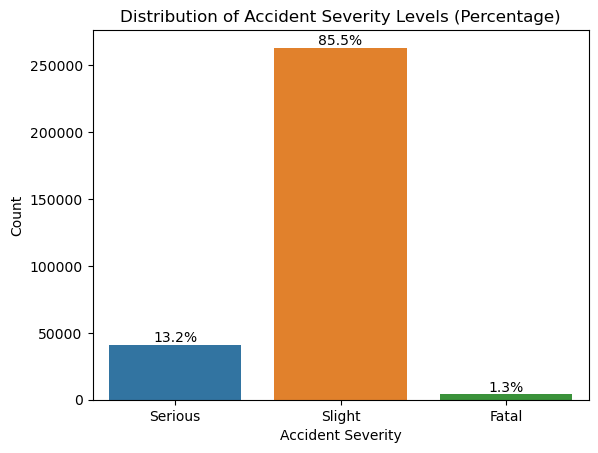

In [14]:
ax = sns.countplot(x='Accident_Severity', data=df)
total = len(df)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom')
ax.set_xlabel('Accident Severity')
ax.set_ylabel('Count')
ax.set_title('Distribution of Accident Severity Levels (Percentage)')

plt.show()


Number of Slight  cases  is very high approx 85.5%  and Fatal approx 1.3%

# Number of accident severity according to speed_limit

Text(0.5, 1.0, 'Count of Accident Severity by Speed Limit')

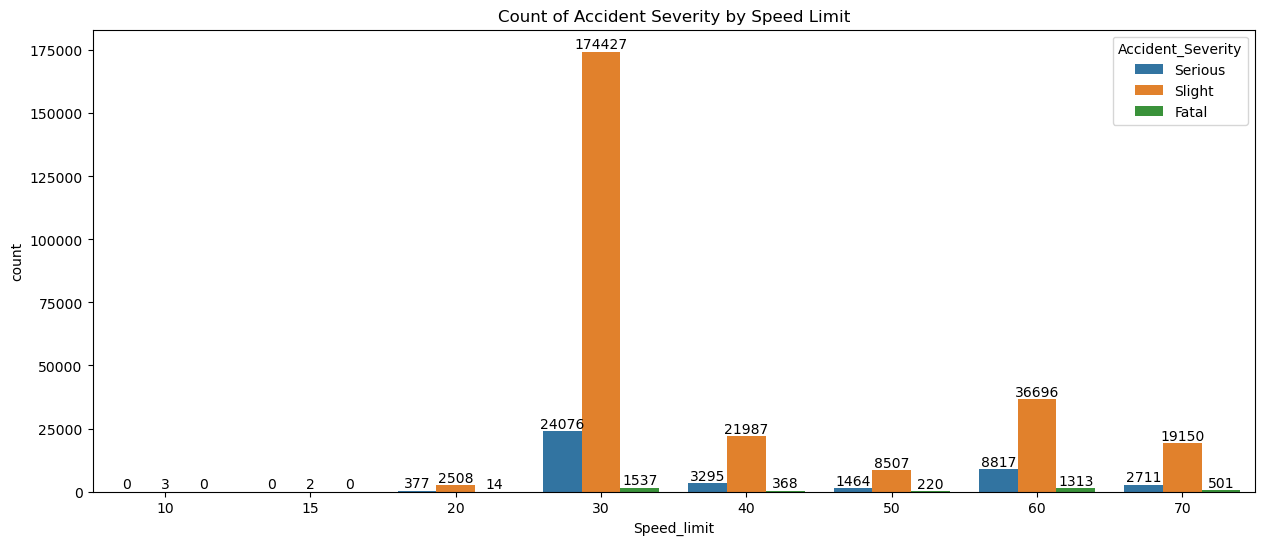

In [15]:
plt.figure(figsize=(15, 6))
ax = sns.countplot(data=df,x='Speed_limit',hue='Accident_Severity')

for bars in ax.containers:
    ax.bar_label(bars)    
ax.set_title('Count of Accident Severity by Speed Limit')

Most number Fatal,serivous and slight  casses  are happend when speed_limit is   30 and 60   KMPH  


# Number of accident according to region(precentage)

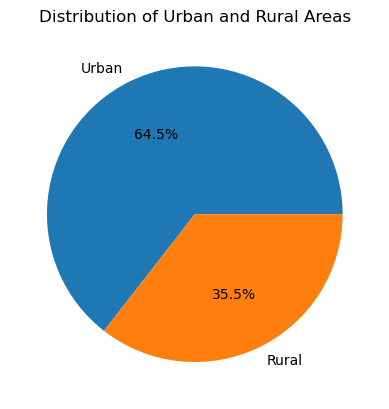

In [16]:
urban_rural_counts = df['Urban_or_Rural_Area'].value_counts()

plt.pie(urban_rural_counts, labels=urban_rural_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Urban and Rural Areas')

plt.show()

Urban Area is the greater Count of accident as compare to rural

# Count of Accident Severity by Region

Text(0.5, 1.0, 'Count of Accident Severity by Region')

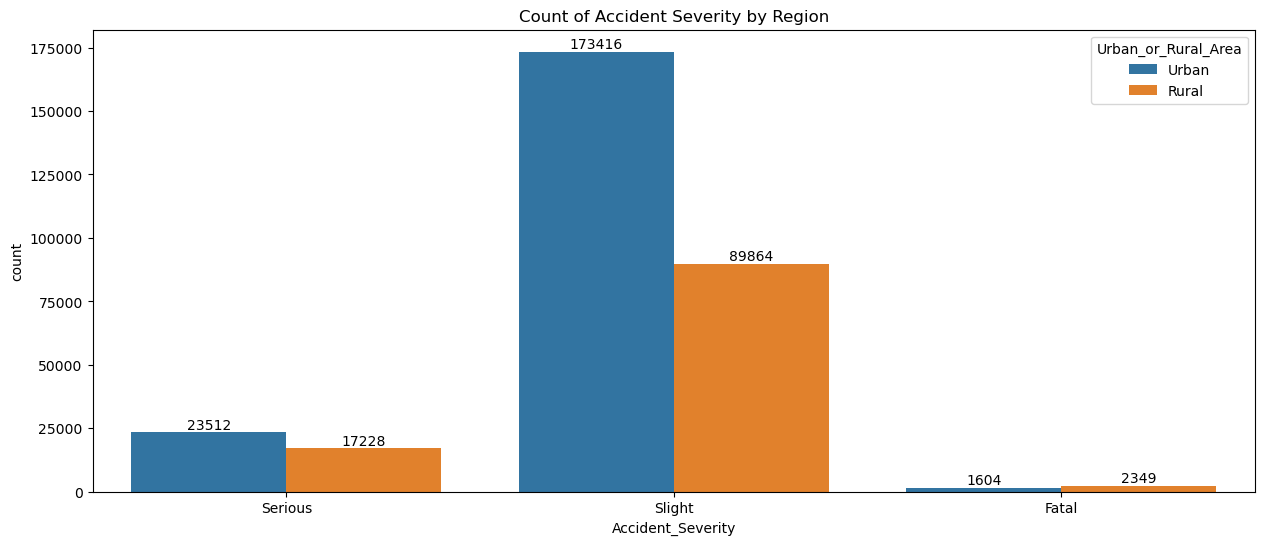

In [17]:
plt.figure(figsize=(15, 6))
ax = sns.countplot(data=df,x='Accident_Severity',hue='Urban_or_Rural_Area')

for bars in ax.containers:
    ax.bar_label(bars)    
ax.set_title('Count of Accident Severity by Region')

Most of The Fatal Type of cases are hapend in rural areas

# number of accidents over different years

In [18]:
monthly_counts=df.groupby(["Year","Month"]).size().reset_index(name="Count")

Text(0.5, 1.0, 'Distribution of accident Month by Year')

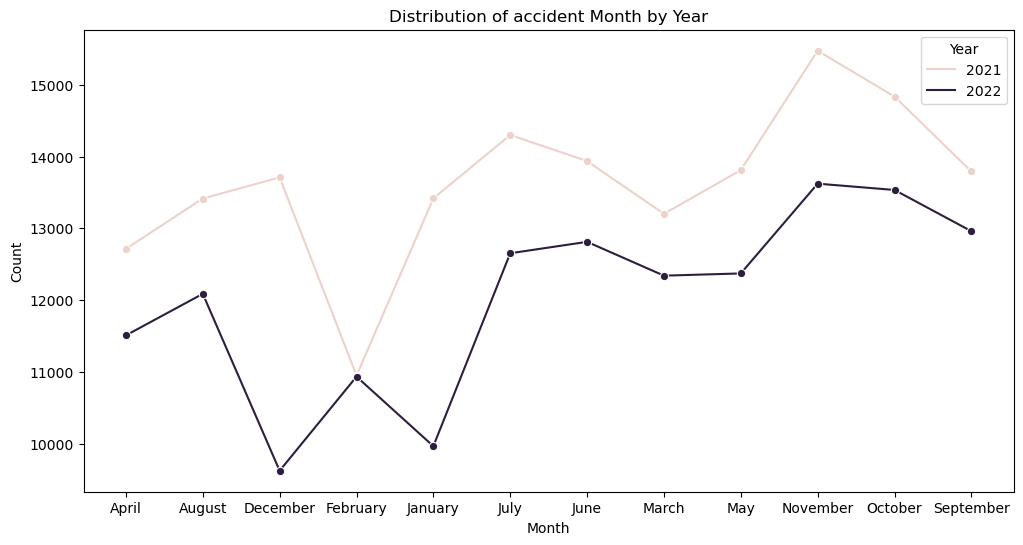

In [19]:
plt.figure(figsize=(12,6))
sns.lineplot(data=monthly_counts,x="Month",y="Count",hue="Year",marker="o")
plt.title("Distribution of accident Month by Year")

# correlation between the number of casualties and the number of vehicles involved in an accident

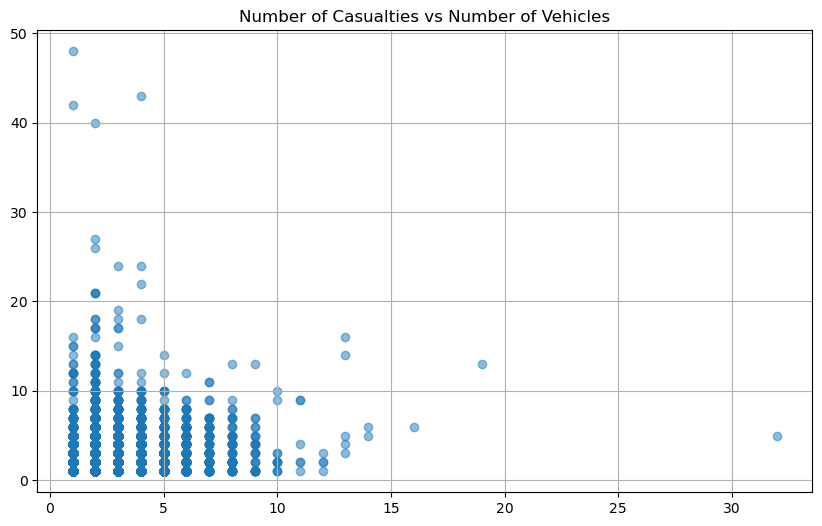

In [20]:
plt.figure(figsize=(10, 6))
plt.scatter( df['Number_of_Vehicles'], df['Number_of_Casualties'], alpha=0.5)
plt.title('Number of Casualties vs Number of Vehicles')
plt.grid(True)



# Count of Accident  by Vechicle_type

Text(0.5, 1.0, 'Count of Accident by Vechical_type')

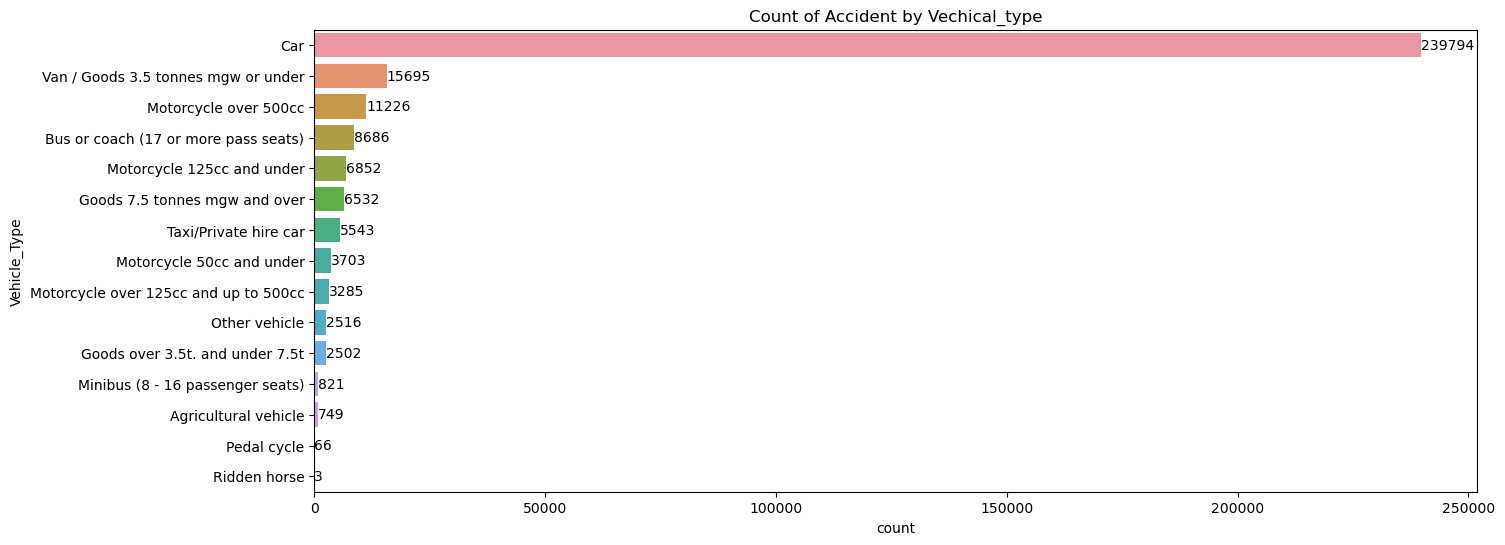

In [21]:
plt.figure(figsize=(15, 6))
ax = sns.countplot(data=df, y='Vehicle_Type', order=df['Vehicle_Type'].value_counts().head(15).index)

for bars in ax.containers:
    ax.bar_label(bars)    
ax.set_title('Count of Accident by Vechical_type')

# Total Number of Casualties by Vechical Type

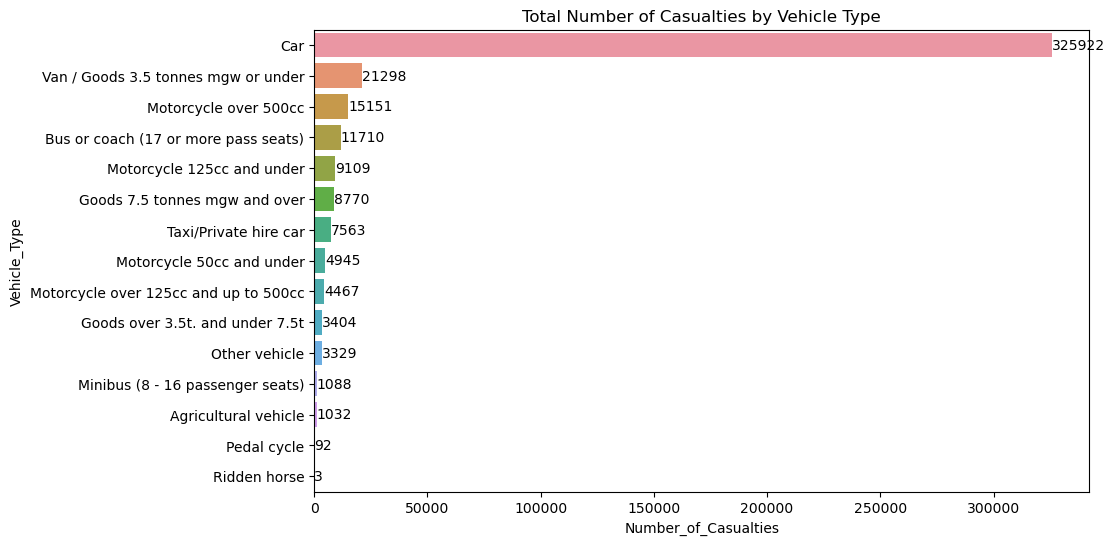

In [22]:
plt.figure(figsize=(10, 6))
total_cas=df.groupby(["Vehicle_Type"],as_index=False)["Number_of_Casualties"].sum().sort_values(by="Number_of_Casualties",ascending=False).head(15)
ax=sns.barplot(x="Number_of_Casualties", y="Vehicle_Type", data=total_cas, orient="h")
plt.title('Total Number of Casualties by Vehicle Type')
for bars in ax.containers:
    ax.bar_label(bars) 


# identify any significant relationships between road characteristics (junction detail, speed limit, junction control) and accident severity

In [23]:
from scipy.stats import chi2_contingency
contingency_table = pd.crosstab(index=df['Accident_Severity'], columns=[df['Junction_Detail'], df['Speed_limit'], df['Junction_Control']])
chi2, p_value, dof, expected = chi2_contingency(contingency_table)
print("Chi-square test statistic:", chi2)
print("p-value:", p_value)
print("Degrees of freedom:", dof)


Chi-square test statistic: 5437.538834558909
p-value: 0.0
Degrees of freedom: 392


# Total Number of accident by Road Surface Conditions in different region

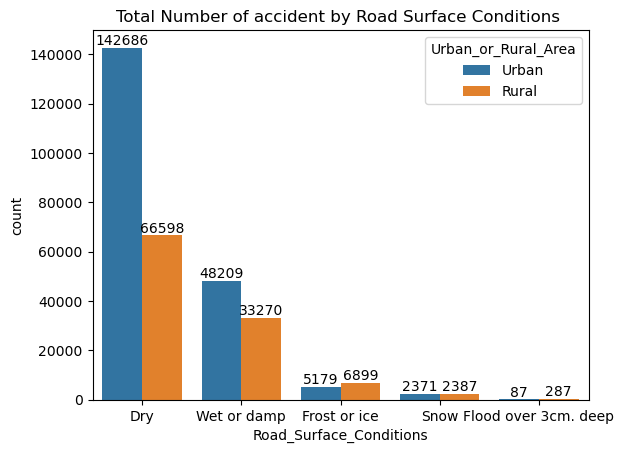

In [24]:
ax=sns.countplot(x='Road_Surface_Conditions',data=df,hue='Urban_or_Rural_Area')
plt.title('Total Number of accident by Road Surface Conditions ')
for bars in ax.containers:
    ax.bar_label(bars)

# Total Number of accident by Light Conditions in different Accident_Severity

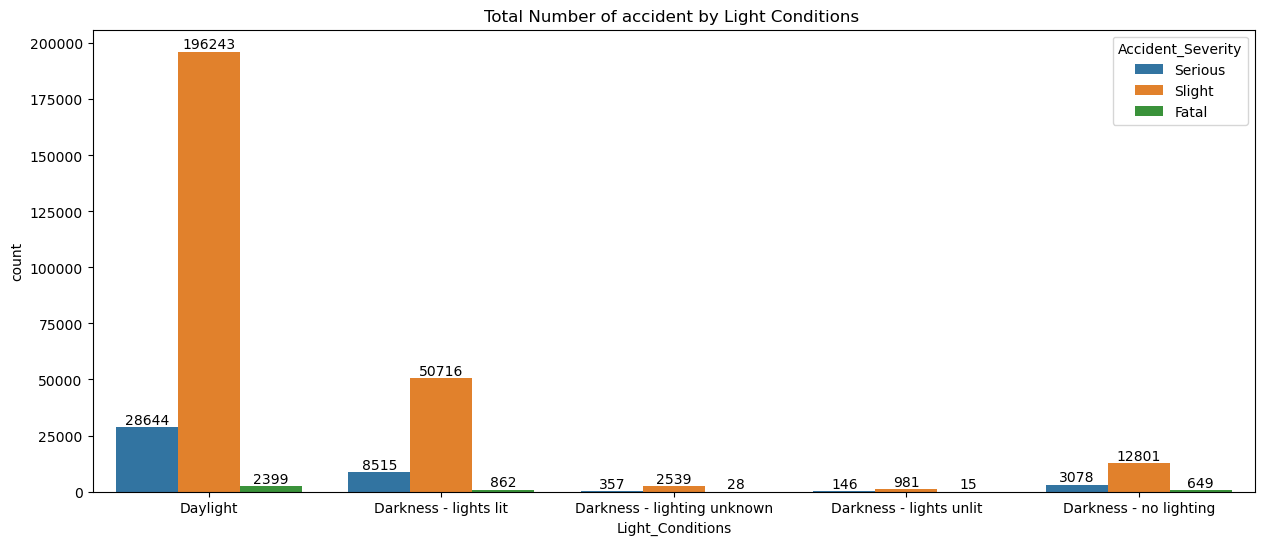

In [25]:
plt.figure(figsize=(15, 6))
ax=sns.countplot(x='Light_Conditions',data=df,hue="Accident_Severity")
plt.title('Total Number of accident by Light Conditions ')
for bars in ax.containers:
    ax.bar_label(bars) 


# Number_of_Casualties vary across different local authorities (districts)

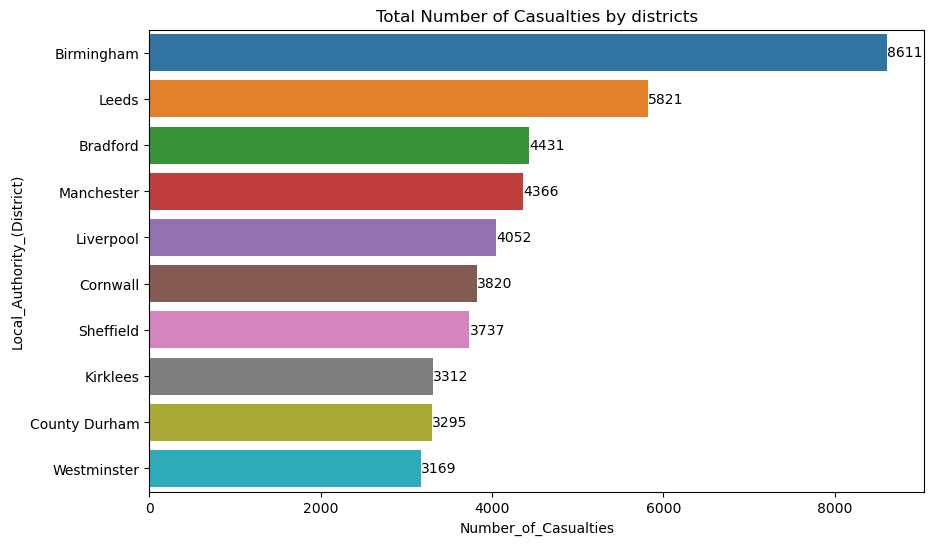

In [26]:
plt.figure(figsize=(10, 6))
total_cas=df.groupby(["Local_Authority_(District)"],as_index=False)["Number_of_Casualties"].sum().sort_values(by="Number_of_Casualties",ascending=False).head(10)
ax=sns.barplot(x="Number_of_Casualties", y="Local_Authority_(District)", data=total_cas, orient="h")
plt.title('Total Number of Casualties by districts')
for bars in ax.containers:
    ax.bar_label(bars) 

# Are there specific times of the day when accidents are more likely to occur

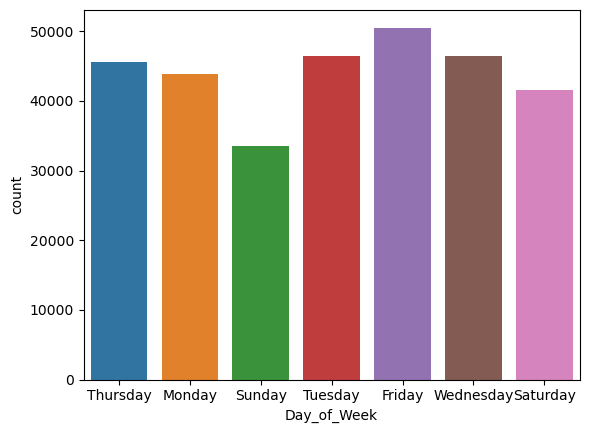

In [27]:
ax = sns.countplot(x='Day_of_Week', data=df)

In [28]:
df.columns

Index(['Month', 'Year', 'Day_of_Week', 'Junction_Control', 'Junction_Detail',
       'Accident_Severity', 'Latitude', 'Light_Conditions',
       'Local_Authority_(District)', 'Longitude', 'Number_of_Casualties',
       'Number_of_Vehicles', 'Police_Force', 'Road_Surface_Conditions',
       'Road_Type', 'Speed_limit', 'Time', 'Urban_or_Rural_Area',
       'Weather_Conditions', 'Vehicle_Type'],
      dtype='object')

# Total Number of accident in different Junction_Control

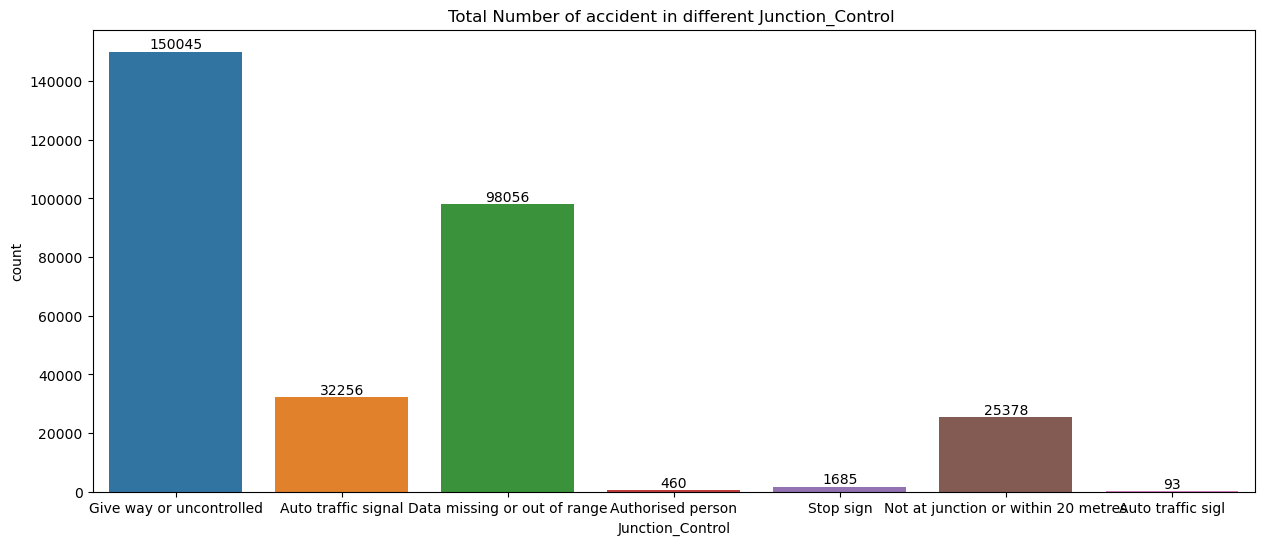

In [29]:
plt.figure(figsize=(15, 6))
ax=sns.countplot(x='Junction_Control',data=df)
plt.title('Total Number of accident in different Junction_Control ')
for bars in ax.containers:
    ax.bar_label(bars) 

# Top 10 Total Number of accident in different police Force Control

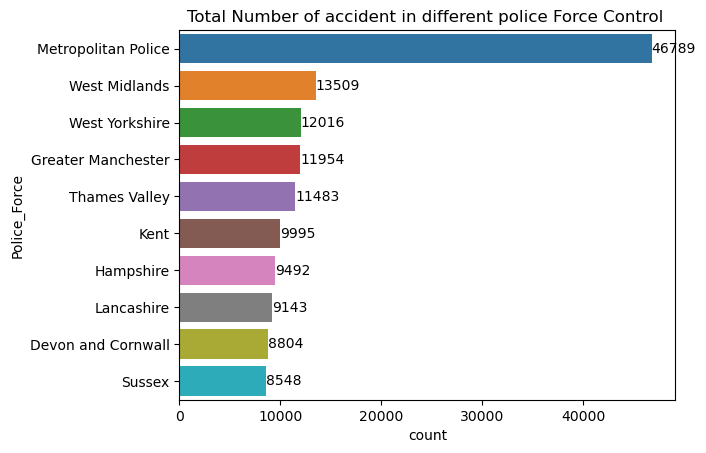

In [30]:
ax = sns.countplot(data=df, y='Police_Force', order=df['Police_Force'].value_counts().head(10).index)
plt.title('Total Number of accident in different police Force Control ')
for bars in ax.containers:
    ax.bar_label(bars) 

# create the correlation heatmap

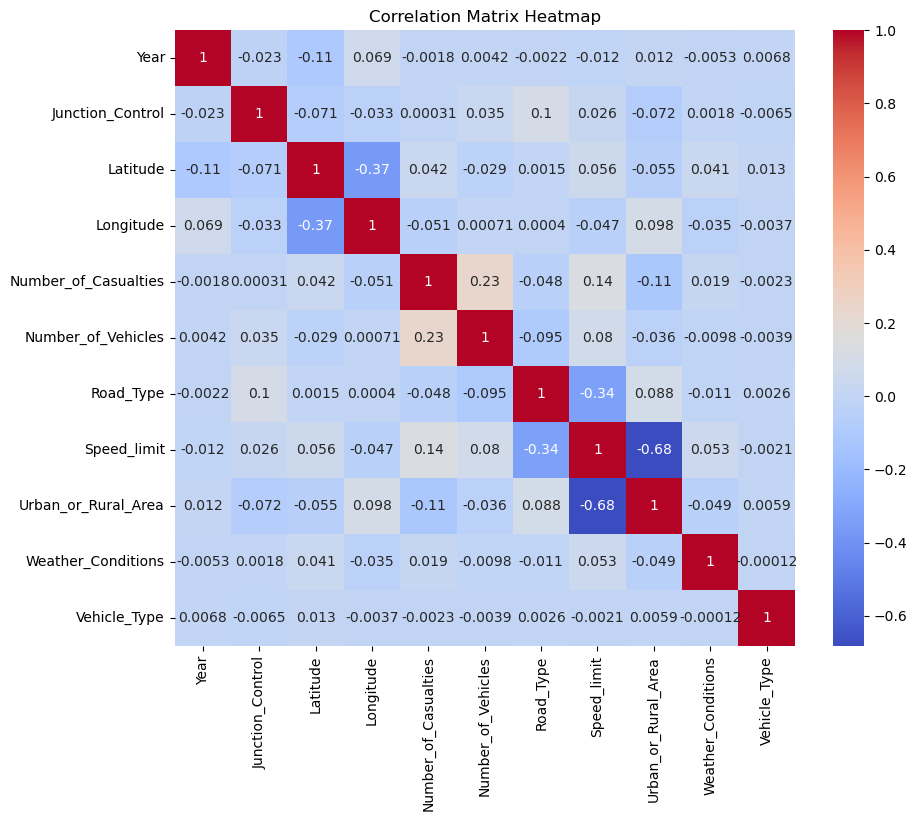

In [42]:
numerical_cols = df.select_dtypes(include='number')
correlation_matrix = numerical_cols.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()


# predict accident severity based on various factors such as weather conditions, road type, or vehicle type using machine learning

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder

In [32]:
features = ['Weather_Conditions', 'Road_Type', 'Vehicle_Type',"Urban_or_Rural_Area",'Junction_Control']
target = 'Accident_Severity'

In [33]:
label_encoder = LabelEncoder()

In [34]:
for feature in features:
    df[feature] = label_encoder.fit_transform(df[feature])

In [35]:
X = df[features]
y = df[target]

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
model = RandomForestClassifier()

In [38]:
model.fit(X_train, y_train)

RandomForestClassifier()

In [39]:
y_pred = model.predict(X_test)
y_pred

array(['Slight', 'Slight', 'Slight', ..., 'Slight', 'Slight', 'Slight'],
      dtype=object)

In [40]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

       Fatal       0.00      0.00      0.00       831
     Serious       0.12      0.00      0.00      8101
      Slight       0.85      1.00      0.92     52663

    accuracy                           0.85     61595
   macro avg       0.33      0.33      0.31     61595
weighted avg       0.75      0.85      0.79     61595

